In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

IMPORT THE DATASET

In [2]:
data=pd.read_csv('C://Users//KRISHNA KANTH//Desktop//analysis//production//new_Crop_production_data.csv')

In [2]:
df =pd.read_csv('C://Users//KRISHNA KANTH//Desktop//cleaned data//Crop_production_data.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman And Nicobar,NICOBAR ISLANDS,2009,Kharif,Arecanut,1254.0,2000.0
1,Andaman And Nicobar,NICOBAR ISLANDS,2009,Kharif,Other Kharif Pulses,2.0,1.0
2,Andaman And Nicobar,NICOBAR ISLANDS,2009,Kharif,Rice,102.0,321.0
3,Andaman And Nicobar,NICOBAR ISLANDS,2009,Whole Year,Banana,176.0,641.0
4,Andaman And Nicobar,NICOBAR ISLANDS,2009,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

EDA - cleaning,preprocessing

In [4]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif Pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut', 'Dry Ginger', 'Sugarcane', 'Sweet Potato', 'Tapioca',
       'Black Pepper', 'Dry Chillies', 'Other Oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor Seed', 'Cotton(Lint)', 'Horse-Gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'Other Misc. Pulses',
       'Samai', 'Small Millets', 'Coriander', 'Potato',
       'Other  Rabi Pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'Other Fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (Vegetable)', 'Niger Seed', 'Bottle Gourd', 'Sannhamp',
       'Var

In [6]:
# Define a function to remove outliers using IQR
coloumn = df['Production']
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataframe
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


In [7]:
df_clean = remove_outliers_iqr(df, 'Production')
df_clean = remove_outliers_iqr(df_clean, 'Area')

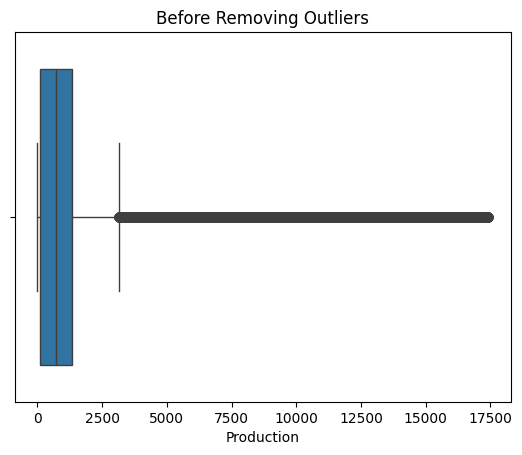

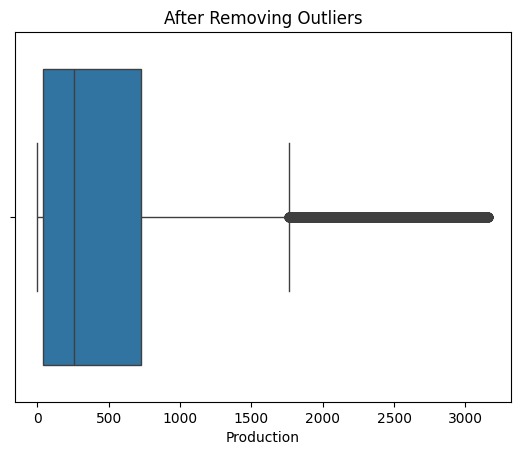

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Production'])
plt.title("Before Removing Outliers")
plt.show()

sns.boxplot(x=df_clean['Production'])
plt.title("After Removing Outliers")
plt.show()


VISUALIZATION

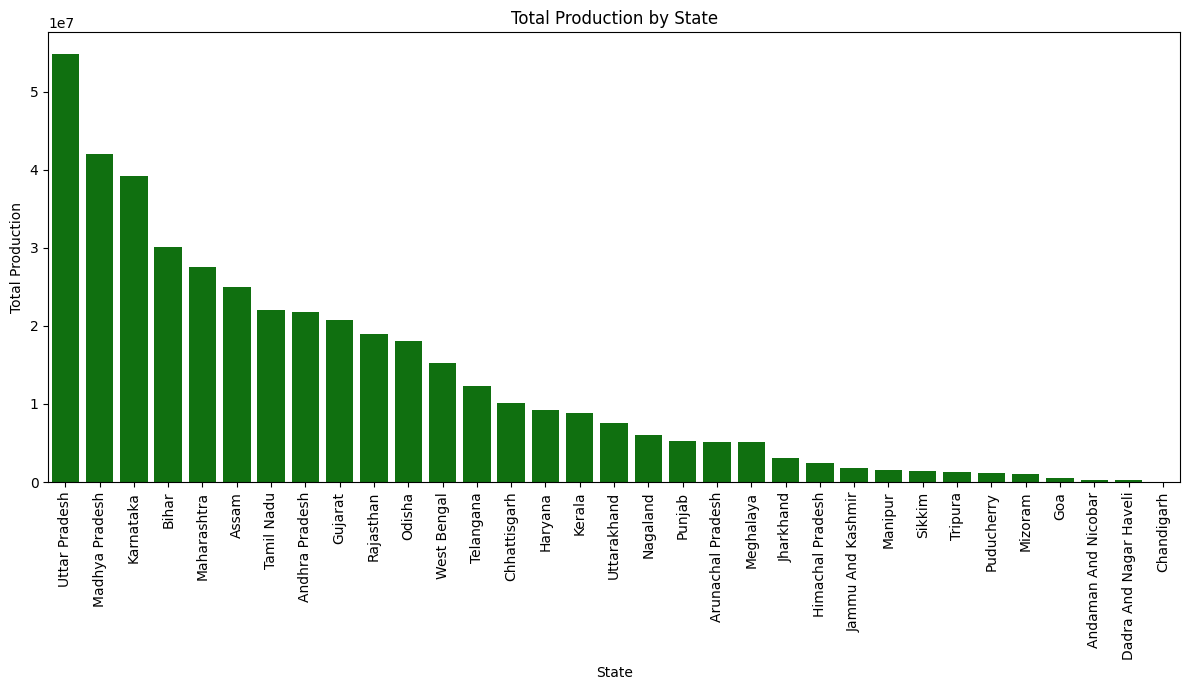

In [6]:
# Group by state and sum the production
state_production_sum = df.groupby('State_Name')['Production'].sum().reset_index()

# Sort (optional, for better visualization)
state_production_sum = state_production_sum.sort_values(by='Production', ascending=False)

# Plot
plt.figure(figsize=(12,7))
sns.barplot(x='State_Name', y='Production', data=state_production_sum,color='green')
plt.title('Total Production by State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

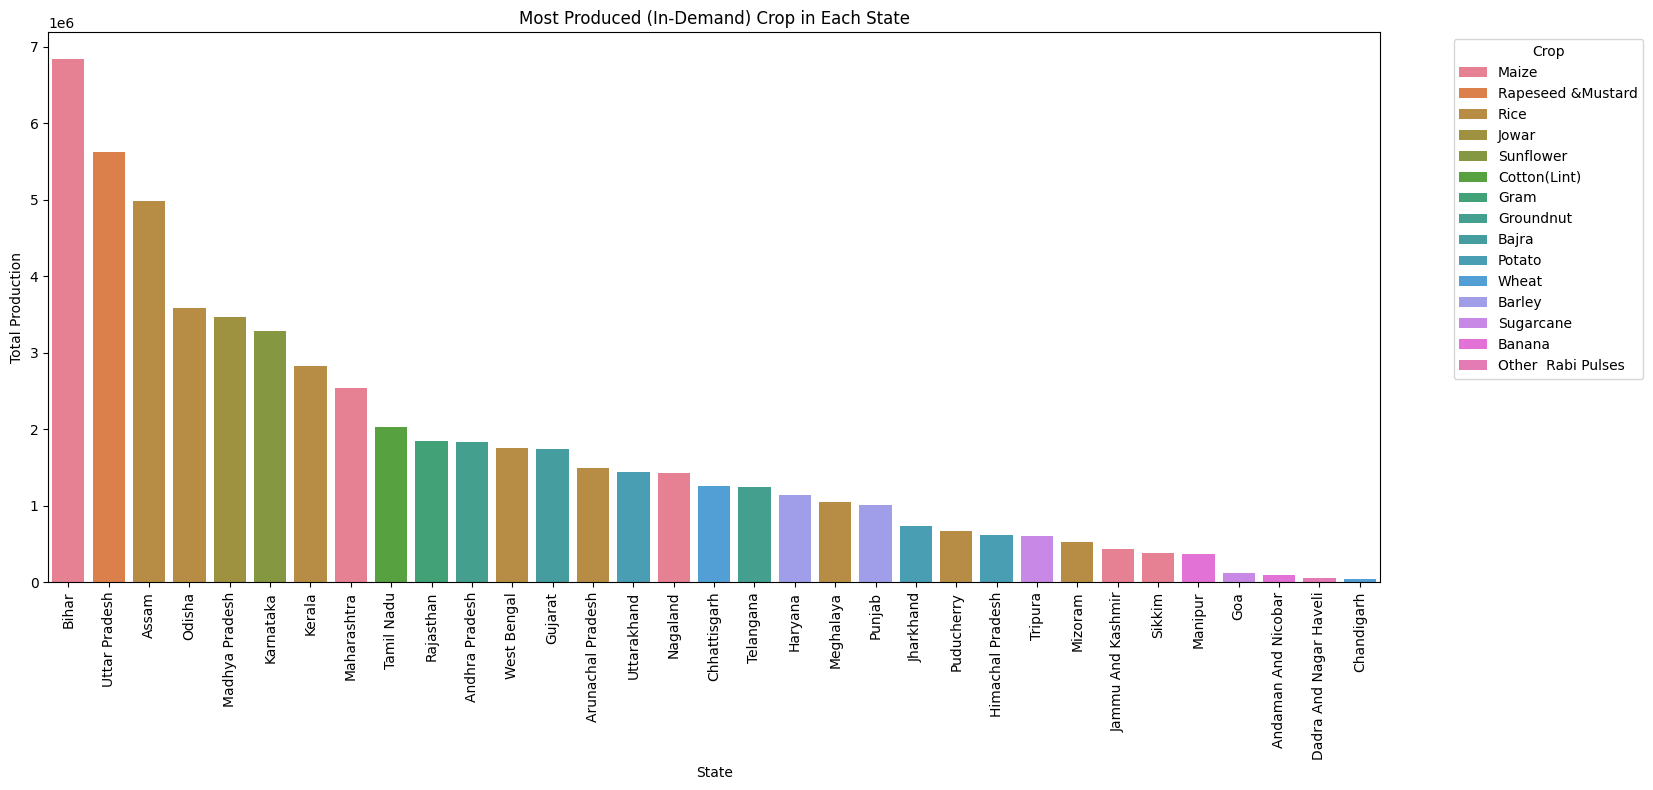

In [5]:
# Step 2: Group by State and Crop, then sum Production
state_crop_prod = df.groupby(['State_Name', 'Crop'])['Production'].sum().reset_index()

# Step 3: Find the crop with highest production per state
most_demanded_crop = state_crop_prod.sort_values('Production', ascending=False).drop_duplicates('State_Name')

# Optional: Sort for better visuals
most_demanded_crop = most_demanded_crop.sort_values('Production', ascending=False)

# Step 4: Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=most_demanded_crop, x='State_Name', y='Production', hue='Crop', dodge=False)
plt.xticks(rotation=90)
plt.title('Most Produced (In-Demand) Crop in Each State')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.tight_layout()
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\KRISHNA KANTH\AppData\Local\Temp\ipykernel_17500\3932960436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_demand, x='State_Name', y='Production', palette='viridis')


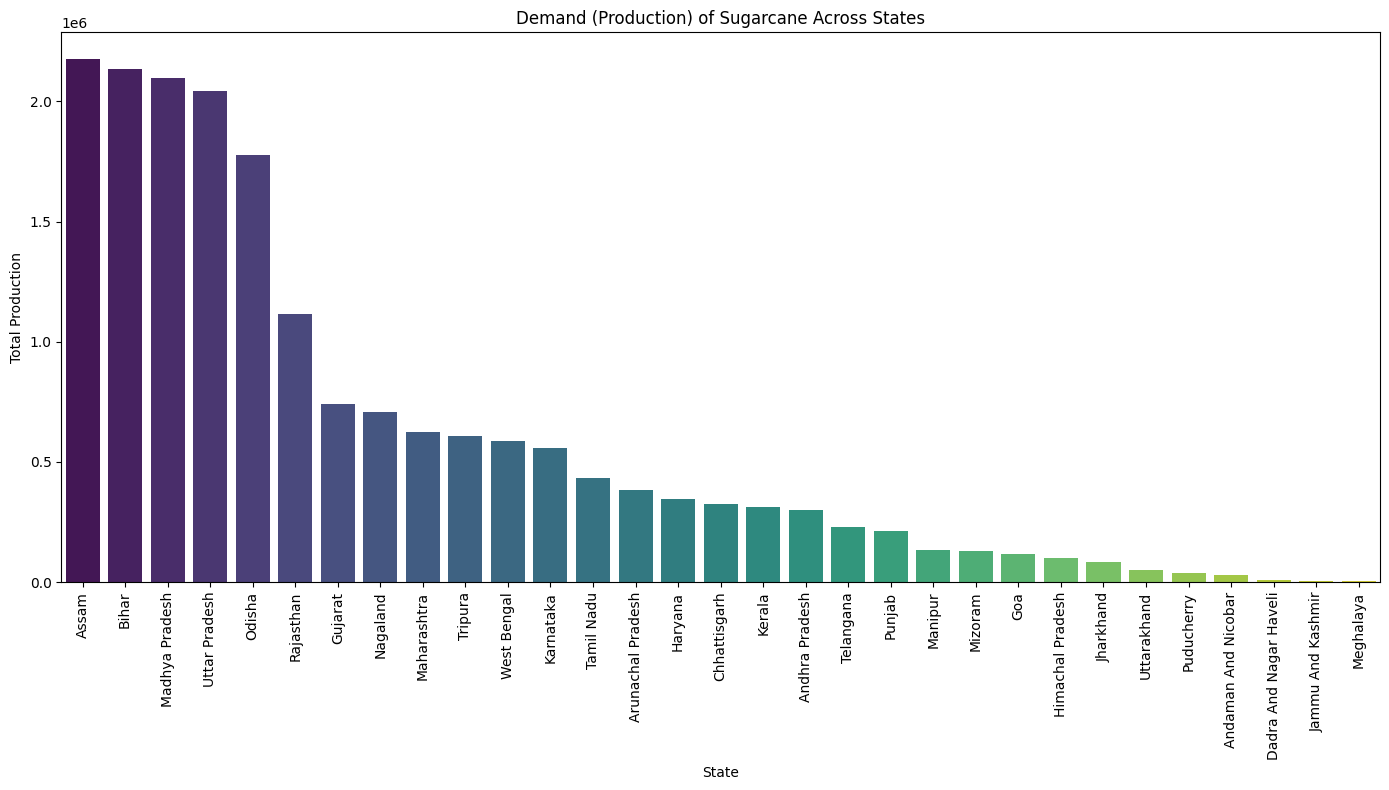

In [7]:
# Clean names
df['State_Name'] = df['State_Name'].str.strip().str.title()
df['Crop'] = df['Crop'].str.strip().str.title()

# Select a specific crop (you can change this)
selected_crop = "Sugarcane"

# Filter for selected crop
crop_df = df[df['Crop'] == selected_crop]

# Group by State and sum production
state_demand = crop_df.groupby('State_Name')['Production'].sum().reset_index()

# Sort in descending order
state_demand = state_demand.sort_values(by='Production', ascending=False)

# ✅ Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=state_demand, x='State_Name', y='Production', palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Demand (Production) of {selected_crop} Across States')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.tight_layout()
plt.show()

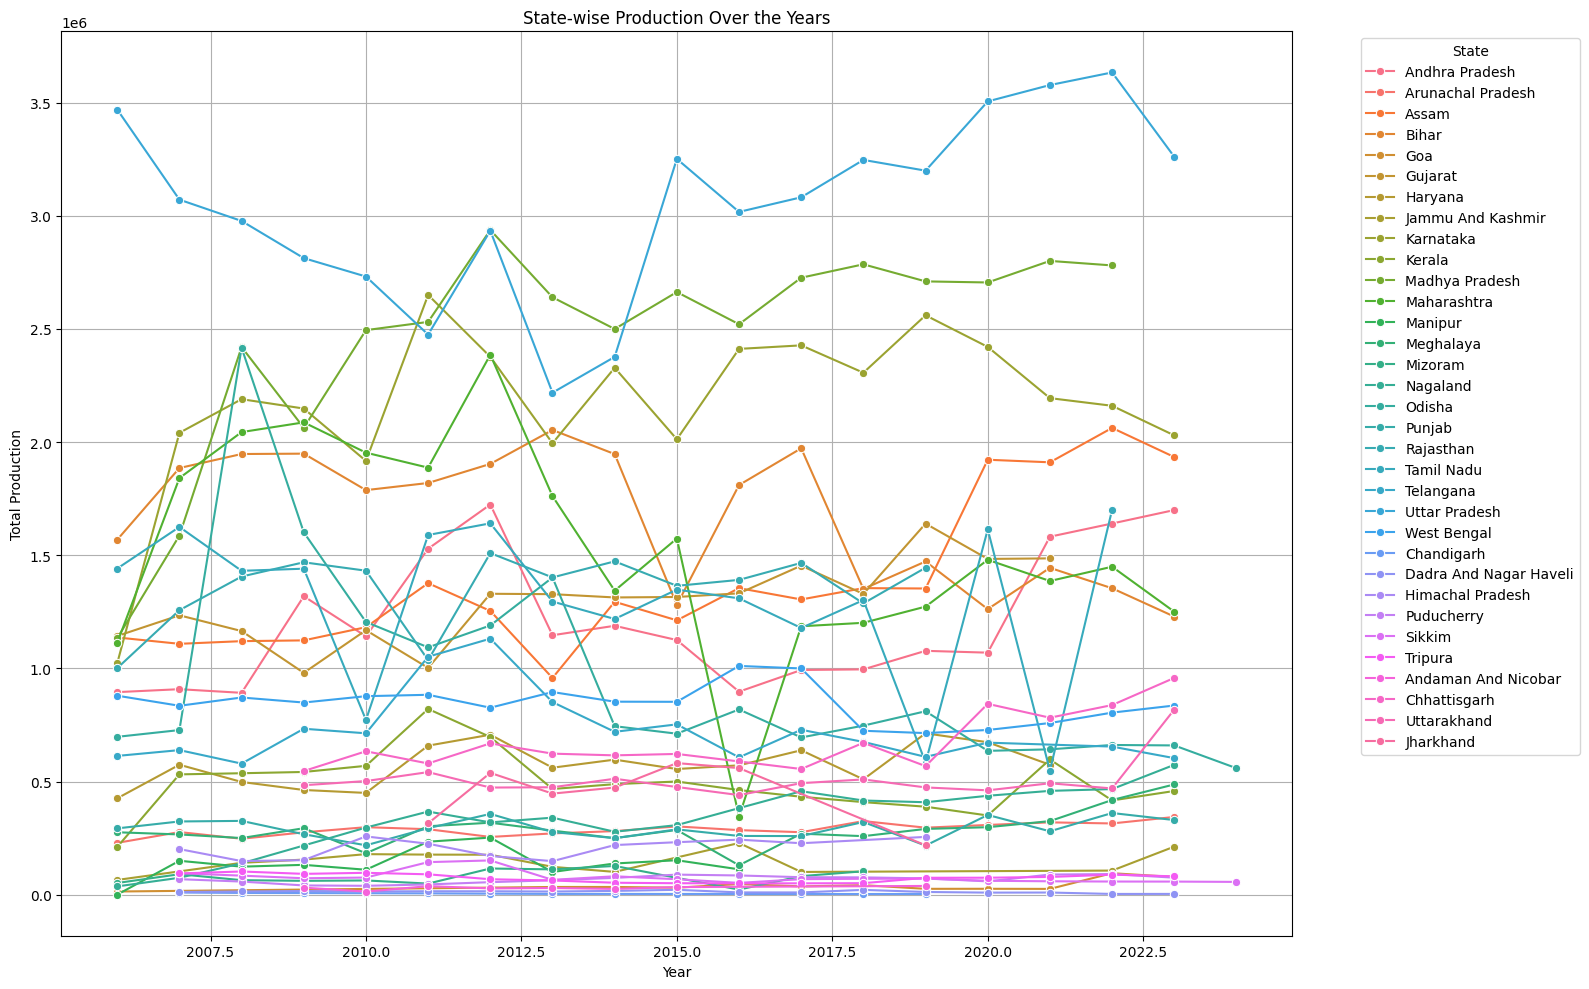

In [8]:
# Clean columns
df['State_Name'] = df['State_Name'].str.strip().str.title()
df['Crop'] = df['Crop'].str.strip().str.title()

# Group by State and Year, and sum production
state_year_prod = df.groupby(['Crop_Year', 'State_Name'])['Production'].sum().reset_index()

# Plot
plt.figure(figsize=(16, 10))
sns.lineplot(data=state_year_prod, x='Crop_Year', y='Production', hue='State_Name', marker='o')

plt.title('State-wise Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\KRISHNA KANTH\AppData\Local\Temp\ipykernel_17500\585563841.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_demand_districts, x='District_Name', y='Production', palette='magma')


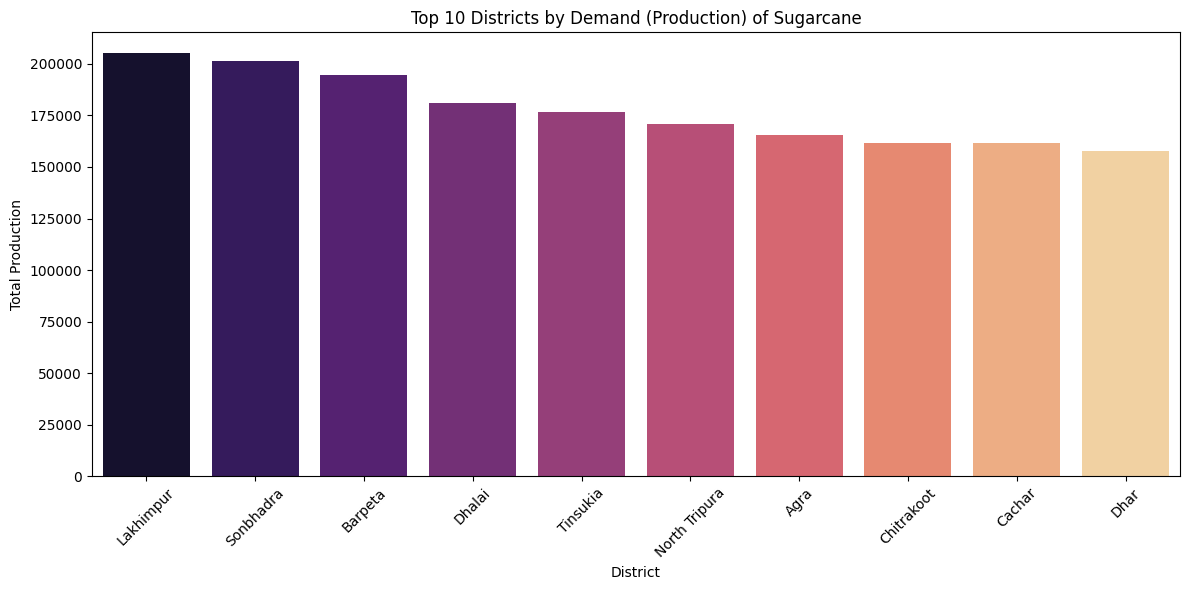

In [9]:
# Clean names
df['District_Name'] = df['District_Name'].str.strip().str.title()
df['Crop'] = df['Crop'].str.strip().str.title()

# Select a specific crop
selected_crop = "Sugarcane"

# Filter dataset for selected crop
crop_df = df[df['Crop'] == selected_crop]

# Group by District and sum production
district_demand = crop_df.groupby('District_Name')['Production'].sum().reset_index()

# Sort in descending order
district_demand = district_demand.sort_values(by='Production', ascending=False)

# ✅ Keep only top 10 districts
top_demand_districts = district_demand.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_demand_districts, x='District_Name', y='Production', palette='magma')
plt.xticks(rotation=45)
plt.title(f'Top 10 Districts by Demand (Production) of {selected_crop}')
plt.xlabel('District')
plt.ylabel('Total Production')
plt.tight_layout()
plt.show()

C:\Users\KRISHNA KANTH\AppData\Local\Temp\ipykernel_17500\4138738290.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_demand, x='Label', y='Production', palette='rocket')


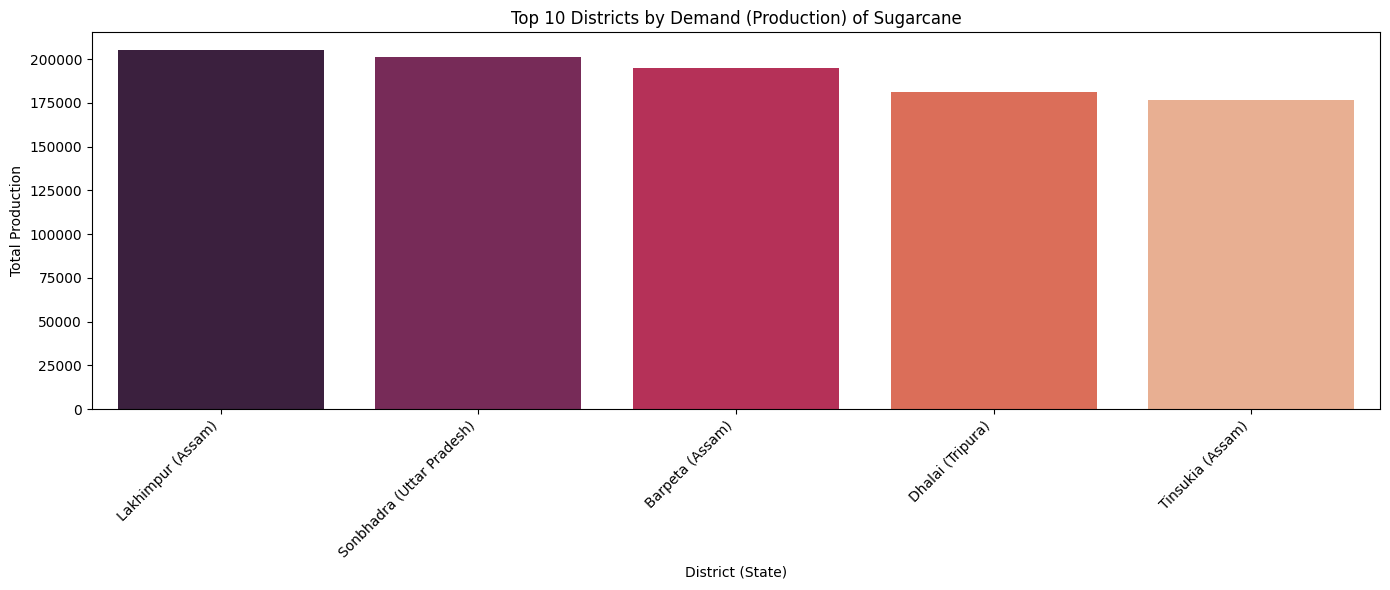

In [10]:
# Clean names
df['State_Name'] = df['State_Name'].str.strip().str.title()
df['District_Name'] = df['District_Name'].str.strip().str.title()
df['Crop'] = df['Crop'].str.strip().str.title()

# Select a specific crop
selected_crop = "Sugarcane"

# Filter dataset for the selected crop
crop_df = df[df['Crop'] == selected_crop]

# Group by both State and District
demand = crop_df.groupby(['State_Name', 'District_Name'])['Production'].sum().reset_index()

# Create a combined label for plotting
demand['Label'] = demand['District_Name'] + " (" + demand['State_Name'] + ")"

# Sort and get top 10
top_demand = demand.sort_values(by='Production', ascending=False).head(5)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_demand, x='Label', y='Production', palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top 10 Districts by Demand (Production) of {selected_crop}')
plt.xlabel('District (State)')
plt.ylabel('Total Production')
plt.tight_layout()
plt.show()

In [11]:
# Recommended crop labels (lowercase)
recommended_crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
    'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango',
    'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya',
    'coconut', 'cotton', 'jute', 'coffee'
]

# Clean your dataset's Crop column
df['Crop'] = df['Crop'].str.strip().str.lower()

# Map original crop names to standard names
crop_mapping = {
    'moong(green gram)': 'mungbean',
    'urad': 'blackgram',
    'arhar/tur': 'pigeonpeas',
    'gram': 'chickpea',
    'masoor': 'lentil',
    'pome granet': 'pomegranate',
    'pome fruit': 'pomegranate',
    'water melon': 'watermelon',
    'muskmelon': 'muskmelon',
    'cotton(lint)': 'cotton',
    'rice': 'rice',
    'maize': 'maize',
    'banana': 'banana',
    'mango': 'mango',
    'grapes': 'grapes',
    'orange': 'orange',
    'papaya': 'papaya',
    'coconut': 'coconut',
    'jute': 'jute',
    'coffee': 'coffee',
    'lentil': 'lentil',
    'apple': 'apple'
}

# Replace old names with mapped ones
df['Crop'] = df['Crop'].replace(crop_mapping)

# Filter dataset to only include recommended crops
filtered_df = df[df['Crop'].isin(recommended_crops)]

# Check the result
print(filtered_df['Crop'].unique())
print(filtered_df.head())

['rice' 'banana' 'coconut' 'maize' 'mungbean' 'blackgram' 'pigeonpeas'
 'cotton' 'chickpea' 'lentil' 'grapes' 'mango' 'orange' 'papaya'
 'pomegranate' 'jute' 'coffee' 'watermelon' 'apple']
             State_Name    District_Name  Crop_Year       Season     Crop  \
2   Andaman And Nicobar  Nicobar Islands       2009  Kharif          rice   
3   Andaman And Nicobar  Nicobar Islands       2009  Whole Year    banana   
5   Andaman And Nicobar  Nicobar Islands       2009  Whole Year   coconut   
12  Andaman And Nicobar  Nicobar Islands       2010  Kharif          rice   
14  Andaman And Nicobar  Nicobar Islands       2010  Whole Year   coconut   

     Area  Production  
2   102.0       321.0  
3   176.0       641.0  
5   582.0       729.0  
12   83.0       300.0  
14  582.0       729.0  
